In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re , spacy, collections , pyLDAvis , pyLDAvis.gensim
from nltk import ngrams

data = pd.read_csv("master_dataset/processed_data.csv")


In [2]:
fake = data[ data['class'] ==1]
real = data[ data['class'] ==0]

In [3]:
print('Number of fake news:', fake.shape)
print('Number of real news:', real.shape)
print('Total number of news:', data.shape)

Number of fake news: (17462, 30)
Number of real news: (21196, 30)
Total number of news: (38658, 30)


C:\Users\Admin\AppData\Local\Temp/ipykernel_21816/3352952948.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


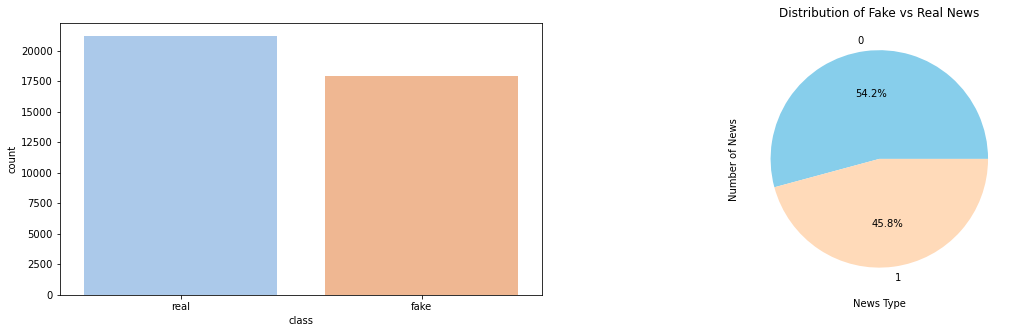

In [15]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
ax = sns.countplot(x = data['class'],ax=ax[0],palette="pastel")
plt.title('Distribution of Fake vs Real News')
ax.set(xticklabels=['real', 'fake'])
plt.xlabel('News Type')
plt.ylabel('Number of News')
plt.pie(data["class"].value_counts().values,explode=[0,0],labels=data["class"].value_counts().index, autopct='%1.1f%%',colors=['SkyBlue','PeachPuff'])
fig.show()

### Text Based Feature EDA

In [5]:
data.columns

Index(['title', 'text', 'class', 'text_without_stopwords',
       'title_without_stopwords', 'text_word_count', 'title_word_count',
       'text_sentence_count', 'title_sentence_count',
       'text_average_word_length', 'title_average_word_length',
       'text_punctuation_count', 'title_punctuation_count',
       'text_stopwords_count', 'title_stopwords_count', 'syllables',
       'flesch_readability', 'subjectivity', 'polarity', 'overall_content',
       'Topic 1 Probability', 'Topic 2 Probability', 'Topic 3 Probbility',
       'Topic 4 Probability', 'Topic 5 Probability', 'polarity_category',
       'polarity_category_Neutral', 'polarity_category_Positive'],
      dtype='object')

([<matplotlib.patches.Wedge at 0x1d16e4e3520>,
 [Text(-0.08080598389107516, 1.0970279818525122, 'Positive'),
  Text(-0.2661682314443817, -1.0673117972597184, 'Neutral'),
  Text(1.0448753587025563, -0.3438538712537704, 'Negative')],
 [Text(-0.044075991213313716, 0.5983788991922793, '52.3%'),
  Text(-0.14518267169693544, -0.5821700712325736, '37.5%'),
  Text(0.5699320138377579, -0.18755665704751112, '10.1%')])

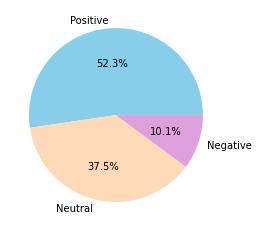

In [7]:
# Plot the Text Word Count
plt.pie(data["polarity_category"].value_counts().values,labels=data["polarity_category"].value_counts().index, autopct='%1.2f%%',colors=['SkyBlue','PeachPuff','Plum'])


### NER EDA

<AxesSubplot:>

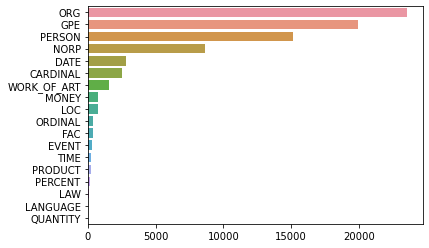

In [8]:
#Here we perform NER analysis to see if there are any interesting traits found in the article samples.

nlp = spacy.load("en_core_web_sm")

def ner(text):
    doc=nlp(text)
    return [X.label_ for X in doc.ents]

#we can see which entities are the most common among titles in the dataset for both real and fake news.
ent=data['title'].apply(lambda x : ner(x))
ent=[x for sub in ent for x in sub]
counter=collections.Counter(ent)
count=counter.most_common()
x,y=map(list,zip(*count))
sns.barplot(x=y,y=x)

<AxesSubplot:>

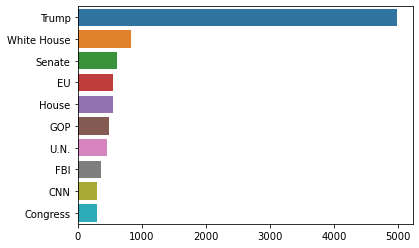

In [9]:
#we can also visualize the some of the most common companies, institutions that shows up in these article titles. 
#It seems that some of the words are the same but the only difference was the capitalization. Despite that, there might be value in retaining the capitalization of words as it may be useful in analyzing
#subjective opinions or bias in the articles.

def ner(text,ent="ORG"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

org = data['title'].apply(lambda x: ner(x))
org = [i for x in org for i in x]
counter = collections.Counter(org)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x= y,y = x)

<AxesSubplot:>

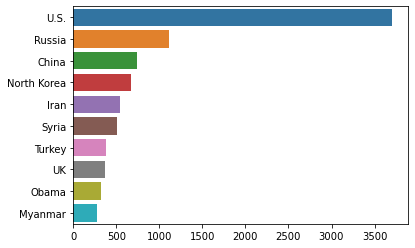

In [10]:
#visualize most common geographic locations based on the article titles.
def ner(text,ent="GPE"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

gpe = data['title'].apply(lambda x: ner(x))
gpe = [i for x in gpe for i in x]
counter = collections.Counter(gpe)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x= y,y = x)

<AxesSubplot:>

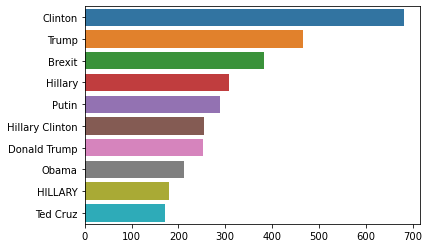

In [11]:
#visualize the most popular person entity based on the article titles. In particular, it seems that Brexit was misclassified as a person in the dataset and this is something we might have to take note of.
def ner(text,ent="PERSON"):
    doc=nlp(text)
    return [X.text for X in doc.ents if X.label_ == ent]

person = data['title'].apply(lambda x: ner(x))
person = [i for x in person for i in x]
counter = collections.Counter(person)

x,y=map(list,zip(*counter.most_common(10)))
sns.barplot(x= y,y = x)

### N-grams

In [12]:
def get_words(text):
  words = re.sub(r'[^\w\s]', '', text).split()

  return words

In [13]:
# Seperate the Words 

word_realnews = get_words(''.join(str((data[data['class'] == 0].text_without_stopwords).tolist())))
word_fakenews = get_words(''.join(str((data[data['class'] == 1].text_without_stopwords).tolist())))
word_mergenews = get_words(''.join(str((data['text_without_stopwords']).tolist())))

In [14]:
true_bigrams_series = (pd.Series(ngrams(word_realnews, 2)).value_counts())[:20]
true_bigrams_series

(united, states)       12003
(white, house)          8199
(donald, trump)         7918
(president, donald)     5870
(north, korea)          5135
(prime, minister)       4064
(said, the)             3880
(said, statement)       3845
(new, york)             3573
(told, reuters)         3452
(us, president)         3414
(trump, said)           3400
(islamic, state)        3330
(last, week)            3171
(told, reporters)       3126
(last, year)            3042
(president, barack)     2891
(said, would)           2833
(last, month)           2403
(barack, obama)         2369
dtype: int64

Text(0.5, 0, '# of Occurances')

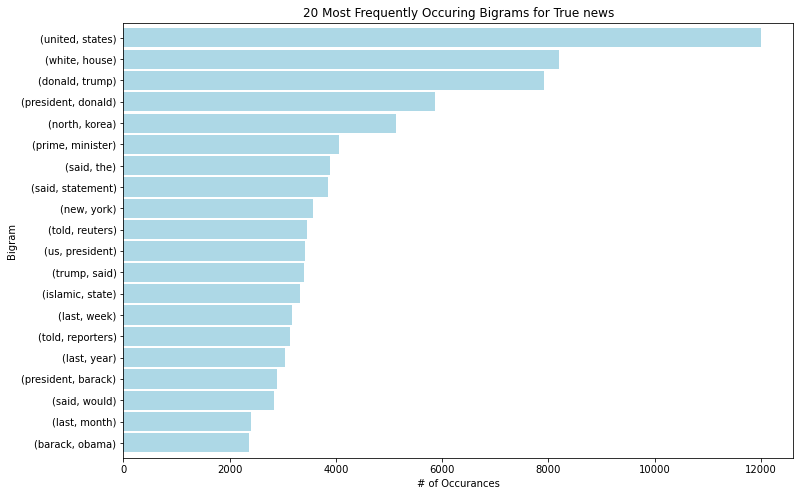

In [15]:
true_bigrams_series.sort_values().plot.barh(color='lightblue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams for True news')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

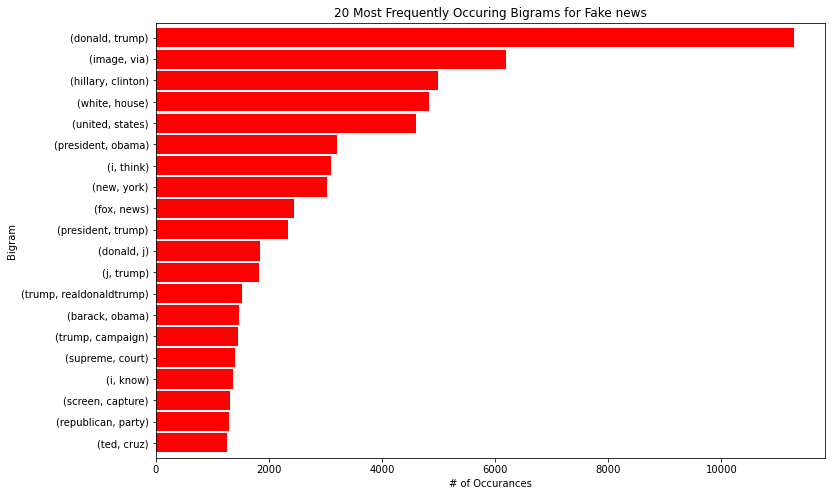

In [16]:
false_bigrams_series = (pd.Series(ngrams(word_fakenews, 2)).value_counts())[:20]
false_bigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams for Fake news')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

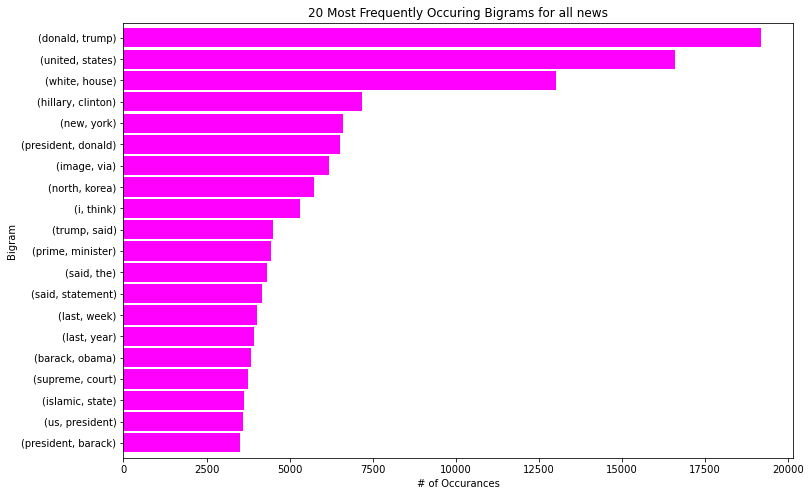

In [17]:
all_bigrams_series = (pd.Series(ngrams(word_mergenews, 2)).value_counts())[:20]
all_bigrams_series.sort_values().plot.barh(color='magenta', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams for all news')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')

In [18]:
%store -r corpus
%store -r id2word
%store -r lda_model

c:\Users\Admin\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


### Topic Modelling Data Visualisation

In [19]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds = "mmds", R = 10)
vis

c:\Users\Admin\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.178729 -0.177330       1        1  32.387418
3     -0.030250  0.233052       2        1  20.296476
4     -0.154575 -0.261882       3        1  17.854864
0     -0.249293  0.074601       4        1  16.963136
2      0.255389  0.131559       5        1  12.498107, topic_info=         Term          Freq         Total Category  logprob  loglift
107     trump  67714.000000  67714.000000  Default  10.0000  10.0000
155  election  28596.000000  28596.000000  Default   9.0000   9.0000
295    police  10876.000000  10876.000000  Default   8.0000   8.0000
491     party  24465.000000  24465.000000  Default   7.0000   7.0000
192    report   8654.000000   8654.000000  Default   6.0000   6.0000
..        ...           ...           ...      ...      ...      ...
531      case   4241.720546   6171.939375   Topic5  -4.7302   1.7045
179  official   4740.654749   9061.716418   Topic5  -4.6190   1.4317
197   russian   3820.766383   6234.410733   Topic5  -4.8347   1.5900
155  election   4466.092449  28596.908095   Topic5  -4.6787   0.2228
137  campaign   3451.273514  12464.181603   Topic5  -4.9364   0.7955

[113 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
1293       5  0.999378     allegation
1982       4  0.981684           ally
1982       5  0.017881           ally
27731      3  0.999080  asylum_seeker
218        1  0.105356         attack
...      ...       ...            ...
585        3  0.514894          woman
119        1  0.060109           year
119        2  0.588024           year
119        3  0.351745           year
119        4  0.000119           year

[176 rows x 3 columns], R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 5, 1, 3])